In [1]:
# Install and import necessary libraries
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Assuming the CIFAR-10 tar file is uploaded (e.g., 'cifar-10-python.tar.gz')
!tar -xvf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [6]:
!ls /content/cifar-10-batches-py

batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch


In [7]:
# Function to unpickle the dataset files (for Python 3)
def unpickle(file):
    with open(file, 'rb') as fo:
        data = pickle.load(fo, encoding='bytes')
    return data

In [9]:
# Load batches.meta to get the class labels
def load_meta(file):
    meta = unpickle(file)
    label_names = meta[b'label_names']  # List of 10 class labels
    return label_names

# Define the path to the CIFAR-10 data
data_path = '/content/cifar-10-batches-py'  # Update this if you use a different path

# Load the labels from batches.meta
label_names = load_meta(os.path.join(data_path, 'batches.meta'))

In [11]:
# Load one batch (e.g., data_batch_1) and return image data and labels
def load_batch(file):
    batch = unpickle(file)
    data = batch[b'data']  # 10000x3072 array of pixel values
    labels = batch[b'labels']  # List of 10000 labels
    return data, labels

In [12]:
# Load the training data (from 5 batches)
train_data = []
train_labels = []

for i in range(1, 6):
    data, labels = load_batch(os.path.join(data_path, f'data_batch_{i}'))
    train_data.append(data)
    train_labels.extend(labels)

# Convert the training data and labels to numpy arrays
train_data = np.vstack(train_data)
train_labels = np.array(train_labels)

# Print the shape of the training data
print(f"Training data shape: {train_data.shape}")

Training data shape: (50000, 3072)


In [13]:
# Load the test data (from test_batch)
test_data, test_labels = load_batch(os.path.join(data_path, 'test_batch'))

# Print the shape of the test data
print(f"Test data shape: {test_data.shape}")

Test data shape: (10000, 3072)


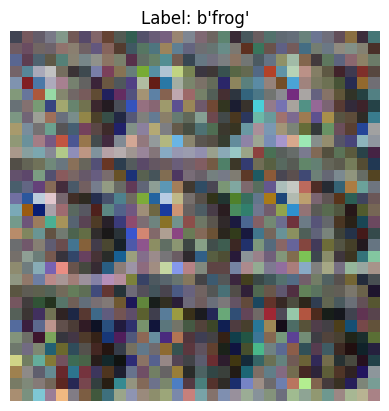

In [14]:
# Visualizing a random image from the dataset
def plot_random_image(data, labels, label_names):
    index = np.random.randint(len(data))  # Random index
    img_data = data[index]  # 3072 elements for a single image
    label = labels[index]  # Label for the image

    # Reshape the flat image data to 32x32x3 (RGB image)
    img = img_data.reshape(32, 32, 3)

    # Plot the image
    plt.imshow(img)
    plt.title(f"Label: {label_names[label]}")
    plt.axis('off')  # No axes for the image
    plt.show()

# Display a random image from the training set
plot_random_image(train_data, train_labels, label_names)

In [15]:
# Preprocessing the data (normalization and splitting)
# Normalize the pixel values to the range [0, 1]
train_data = train_data / 255.0
test_data = test_data / 255.0

# Split the training data into training and validation sets (e.g., 80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [16]:
# Training a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Load batches.meta to get the class labels
def load_meta(file):
    meta = unpickle(file)
    # Decode label names from bytes to strings
    label_names = [label.decode('utf-8') for label in meta[b'label_names']]
    return label_names

# Load the labels from batches.meta
label_names = load_meta(os.path.join(data_path, 'batches.meta'))

In [19]:
# Model evaluation (on the validation set)
y_pred = clf.predict(X_val)

# Print validation accuracy and classification report
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print("Classification Report:\n", classification_report(y_val, y_pred, target_names=label_names))

Validation Accuracy: 0.4576
Classification Report:
               precision    recall  f1-score   support

    airplane       0.51      0.52      0.52       973
  automobile       0.49      0.54      0.51       979
        bird       0.38      0.30      0.34      1030
         cat       0.35      0.28      0.31      1023
        deer       0.36      0.42      0.39       933
         dog       0.40      0.37      0.39      1015
        frog       0.45      0.53      0.49       996
       horse       0.50      0.44      0.47       994
        ship       0.59      0.60      0.60      1017
       truck       0.51      0.56      0.53      1040

    accuracy                           0.46     10000
   macro avg       0.45      0.46      0.45     10000
weighted avg       0.45      0.46      0.45     10000



In [20]:
# Evaluate the model on the test set
y_test_pred = clf.predict(test_data)
test_accuracy = accuracy_score(test_labels, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.4604


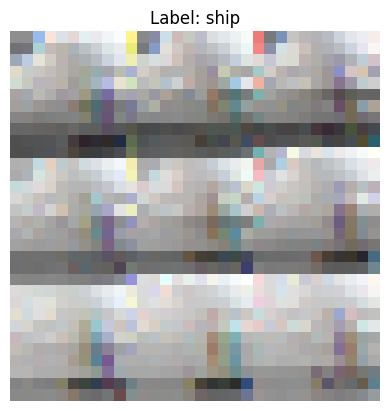

In [21]:
# Plot a random image from the test set
plot_random_image(test_data, test_labels, label_names)